In [90]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import datetime

import matplotlib.pyplot as plt

from tqdm import tqdm

import feather

In [91]:
# # Load in the time_series from the previous stage in the pipeline
# time_series = feather.read_dataframe("../data_files/B/once/75days/10mins/interp_diff_percent_from_code_-_full_segment_time_series.feather")
# time_series = time_series.set_index(time_series.columns[0])


In [92]:
# time_series5 = feather.read_dataframe("../data_files/B/once/75days/5mins/interp_diff_percent_from_code_-_full_segment_time_series.feather")
# time_series5 = time_series5.set_index(time_series5.columns[0])



In [93]:
# time_series1 = feather.read_dataframe("../data_files/B/once/75days/1hour/interp_diff_percent_from_code_-_full_segment_time_series.feather")
# time_series1 = time_series1.set_index(time_series1.columns[0])



In [94]:
print("Loading data...")

# time_series_1hour_c = feather.read_dataframe(
#     "../../data_files/B/once/75days/1hour/padded_diff_percent_from_code_-_full_segment_time_series.feather"
# )

time_series_1hour_chd = feather.read_dataframe(
    "../../data_files/B/once/75days/1hour/diff_percent_from_code_hour_day_-_full_segment_time_series.feather"
)

# time_series_10mins_c = feather.read_dataframe(
#     "../../data_files/B/once/75days/10mins/diff_percent_from_code_-_full_segment_time_series.feather"
# )

time_series_10mins_chd = feather.read_dataframe(
    "../../data_files/B/once/75days/10mins/diff_percent_from_code_hour_day_-_full_segment_time_series.feather"
)

# time_series_5mins_c = feather.read_dataframe(
#     "../../data_files/B/once/75days/5mins/diff_percent_from_code_-_full_segment_time_series.feather"
# )

time_series_5mins_chd = feather.read_dataframe(
    "../../data_files/B/once/75days/5mins/diff_percent_from_code_hour_day_-_full_segment_time_series.feather"
)

Loading data...


In [95]:
time_wide_1hour = pd.concat([time_series_1hour_chd, time_series_1hour_chd.shift(1)], axis=1)

In [96]:
time_wide_5mins = pd.concat([time_series_5mins_chd, time_series_5mins_chd.shift(1)], axis=1)

In [97]:
time_wide_10mins = pd.concat([time_series_10mins_chd, time_series_10mins_chd.shift(1)], axis=1)

In [98]:
correlations_1h = time_wide_1hour.corr(method="pearson", min_periods=100)
correlations_1h = correlations_1h.fillna(value=float("-inf"))



In [141]:
correlations_5m = time_wide_5mins.corr(method="pearson", min_periods=100)
correlations_5m = correlations_5m.fillna(value=float("-inf"))



In [100]:
correlations_10m = time_wide_10mins.corr(method="pearson", min_periods=100)
correlations_10m = correlations_10m.fillna(value=float("-inf"))




In [101]:
correlations_1h = correlations_1h.iloc[:time_series_1hour_chd.shape[1], time_series_1hour_chd.shape[1]:]

best_correlations_1h = pd.DataFrame(
    np.fliplr(
        correlations_1h.columns[np.argsort(correlations_1h.values, axis=1)[:, -30:]]
    ),
    index=correlations_1h.index,
)

In [142]:
correlations_5m = correlations_5m.iloc[:time_series_5mins_chd.shape[1], time_series_5mins_chd.shape[1]:]

best_correlations_5m = pd.DataFrame(
    np.fliplr(
        correlations_5m.columns[np.argsort(correlations_5m.values, axis=1)[:, -31:-1]]
    ),
    index=correlations_5m.index,
)

In [143]:
correlations_5m_trimmed = correlations_5m.drop(correlations_5m.index[~correlations_5m.index.isin(correlations_5m.columns)])



In [144]:
best_segs = correlations_5m_trimmed.columns[np.argmax(correlations_5m_trimmed.values,axis=0)]

In [145]:
np.count_nonzero(best_segs == correlations_5m_trimmed.index)

46

In [146]:
len(correlations_5m_trimmed.index)

1148

In [148]:
46/1148*100

4.006968641114982

In [108]:
correlations_10m = correlations_10m.iloc[:time_series_10mins_chd.shape[1], time_series_10mins_chd.shape[1]:]

best_correlations_10m = pd.DataFrame(
    np.fliplr(
        correlations_10m.columns[np.argsort(correlations_10m.values, axis=1)[:, -31:-1]]
    ),
    index=correlations_10m.index,
)

In [109]:
# plt.hist(correlations.values.flatten(), range=(-1,1))
# plt.yscale("log")
# plt.show()

In [110]:
# plt.hist(np.sort(correlations.values, axis=1)[:, -2:-1].flatten(), bins=100, range=(0,1))
# plt.show()


In [111]:
# plt.hist(np.sort(correlations5.values, axis=1)[:, -2:-1].flatten(), bins=100, range=(0,1))
# plt.show()

In [112]:
# best_correlations_1h.shape

In [139]:
best_1h = np.amax(correlations_1h.values, axis=1)
best_10m = np.amax(correlations_10m.values, axis=1)
best_5m = np.amax(correlations_5m.values, axis=1)

best_1h = best_1h[np.isfinite(best_1h)]
best_10m = best_10m[np.isfinite(best_10m)]
best_5m = best_5m[np.isfinite(best_5m)]


In [140]:
print(f"mean coorelation coef 1h: {np.mean(best_1h)}")
print(f"mean coorelation coef 10mins: {np.mean(best_10m)}")
print(f"mean coorelation coef 5mins: {np.mean(best_5m)}")

mean coorelation coef 1h: 0.27085377848018594
mean coorelation coef 10mins: 0.3092062484733277
mean coorelation coef 5mins: 0.3377958901157332


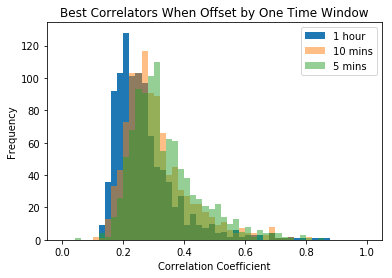

In [113]:
plt.hist(np.amax(correlations_1h.values, axis=1).flatten(), bins=50, range=(0,1), label="1 hour")
plt.hist(np.amax(correlations_10m.values, axis=1).flatten(), bins=50, range=(0,1), alpha=0.5, label="10 mins")
plt.hist(np.amax(correlations_5m.values, axis=1).flatten(), bins=50, range=(0,1), alpha=0.5, label="5 mins")
plt.title("Best Correlators When Offset by One Time Window")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("short-best-correlators-with-offset.pdf", bbox="tight")
plt.show()